In [2]:
# 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import pickle
sns.set()

In [3]:
# 데이터 로드
with open('./pkl/factor.pkl', 'rb') as f:
    df = pickle.load(f)

In [4]:
# 팩터 수익률 데이터프레임
factor_df = df.iloc[:, 5:]

<Axes: xlabel='Date'>

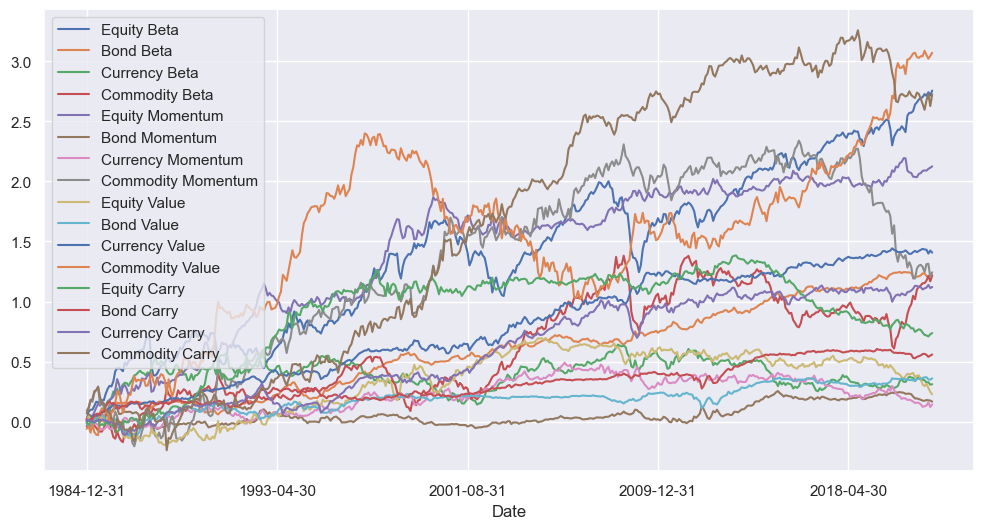

In [5]:
# 팩터별 누적 수익률 시각화
factor_df.cumsum().plot(legend=True, figsize=(12, 6), label=factor_df.columns)

<Axes: >

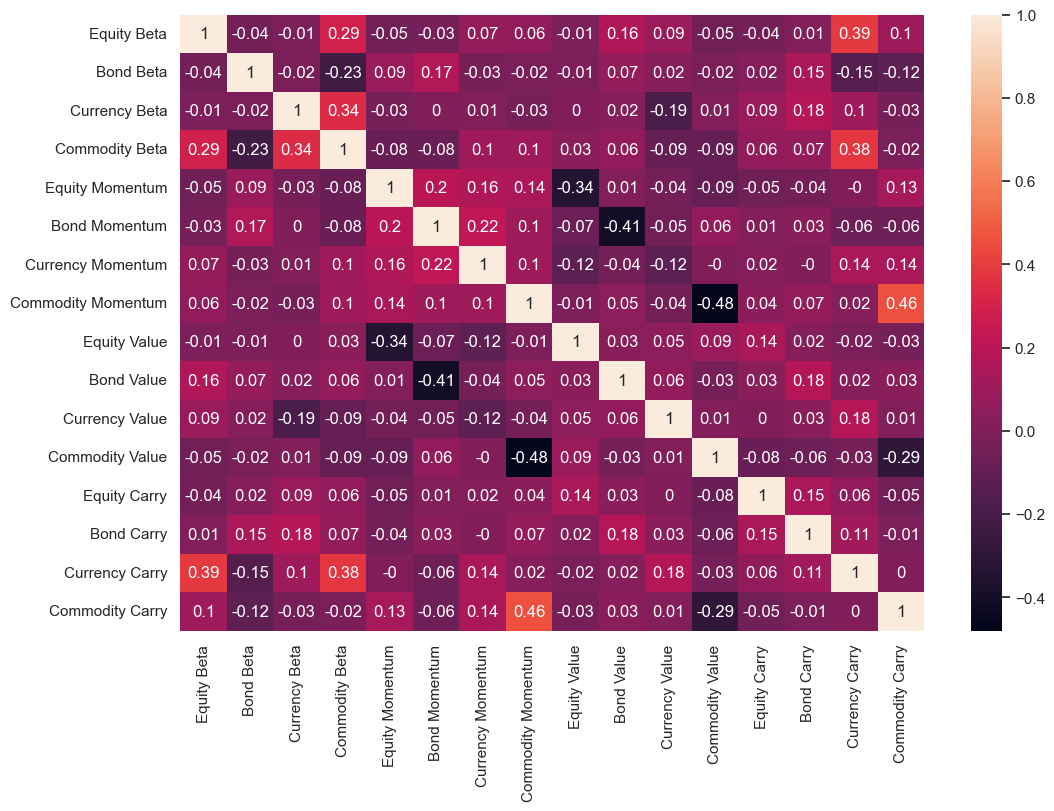

In [6]:
# 상관계수 행렬
corr = factor_df.corr()

# 상관계수 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(np.round(corr, 2), annot=True)

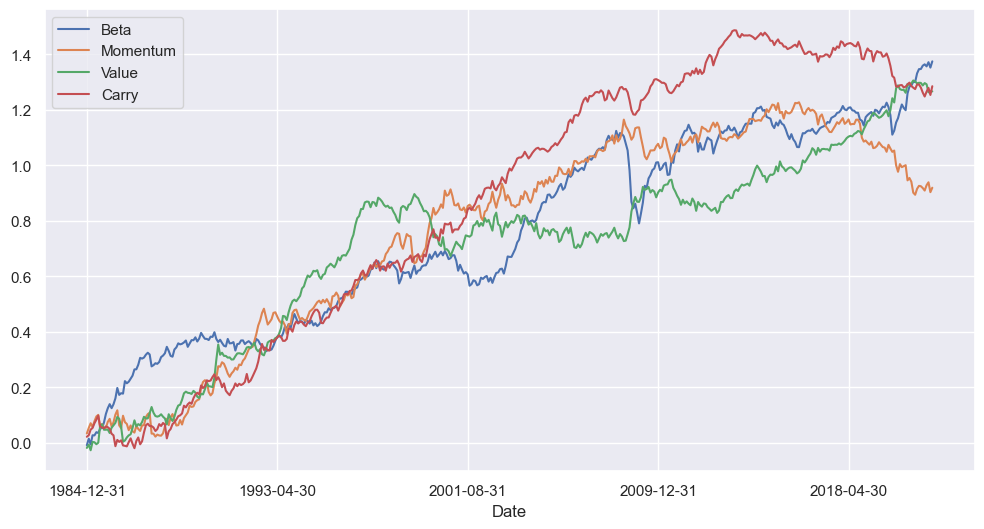

In [7]:
# 팩터별 데이터 프레임
beta_df = factor_df.iloc[:, :4]
momentum_df = factor_df.iloc[:, 4:8]
value_df = factor_df.iloc[:, 8:12]
carry_df = factor_df.iloc[:, 12:]

# 팩터별 포트폴리오
beta_port = beta_df.mean(axis=1)
momentum_port = momentum_df.mean(axis=1)
value_port = value_df.mean(axis=1)
carry_port = carry_df.mean(axis=1)

# 팩터별 포트폴리오 백테스팅 결과 시각화
plt.figure(figsize=(12, 6))
beta_port.cumsum().plot(label='Beta')
momentum_port.cumsum().plot(label='Momentum')
value_port.cumsum().plot(label='Value')
carry_port.cumsum().plot(label='Carry')
plt.legend()
plt.show()

In [9]:
# 팩터 포트폴리오 수익률 분포 분석
factor_port_df = pd.concat([beta_port, momentum_port, value_port, carry_port], axis=1, join='inner')
factor_port_df.columns = ['beta', 'momentum', 'value', 'carry']

# 팩터 포트폴리오 왜도
print('Skew')
print(factor_port_df.skew())

# 팩터 포트폴리오 첨도
print('\n')
print('Kurtosis')
print(factor_port_df.kurt())

Skew
beta       -0.942148
momentum   -0.428023
value       0.208522
carry      -0.362319
dtype: float64


Kurtosis
beta        4.849472
momentum    0.745264
value       0.921677
carry       0.370844
dtype: float64


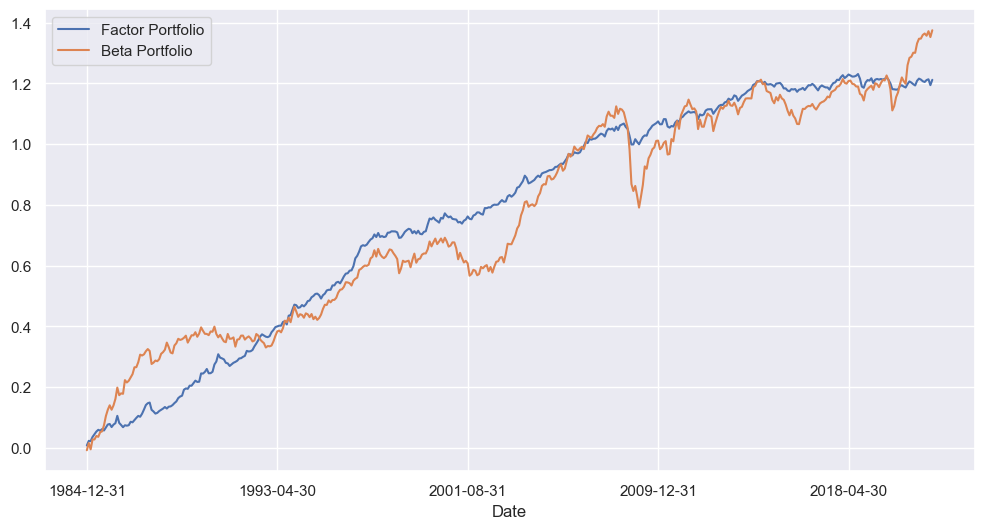

In [10]:
# 자산배분 vs. 팩터배분
factor_port = factor_df.mean(axis=1)

# 그래프
plt.figure(figsize=(12, 6))
factor_port.cumsum().plot(label='Factor Portfolio')
beta_port.cumsum().plot(label='Beta Portfolio')
plt.legend()
plt.show()

<Axes: >

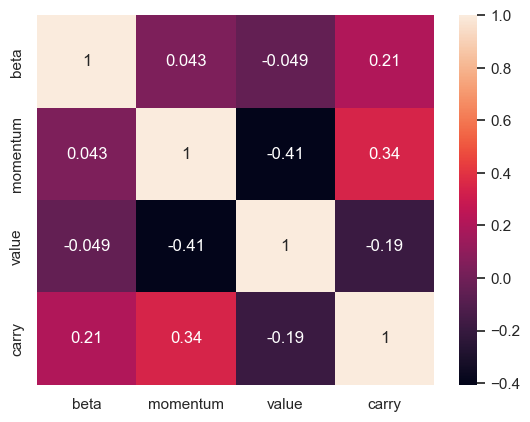

In [11]:
# 팩터 포트폴리오간 상관계수 히트맵
sns.heatmap(factor_port_df.corr(), annot=True)

<Axes: xlabel='Date'>

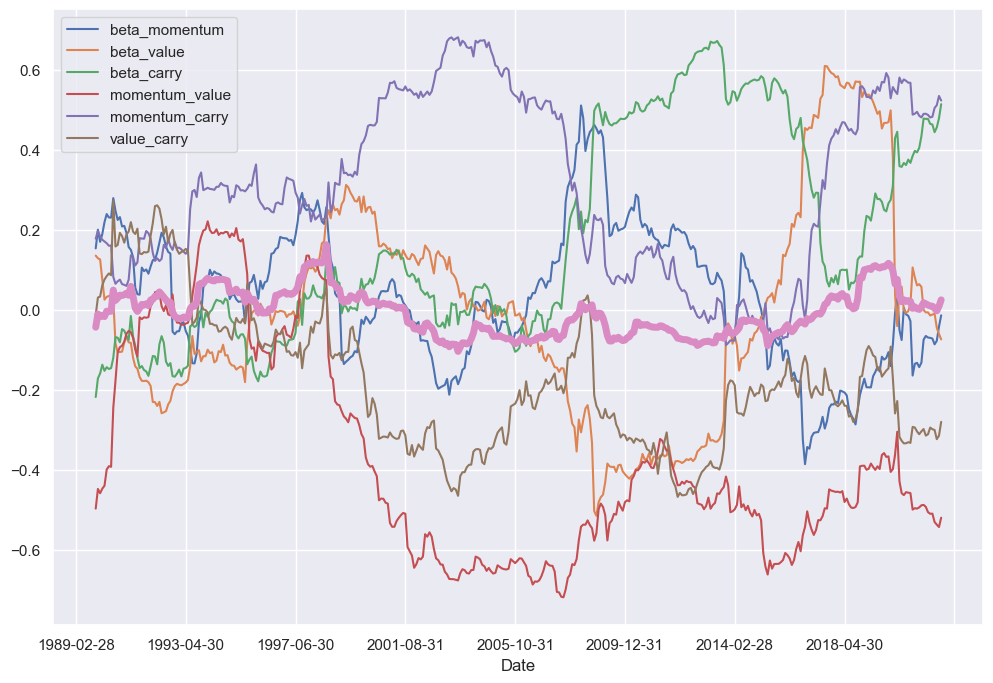

In [12]:
# 롤링 상관계수
cols = factor_port_df.columns
col_pairs = list(it.combinations(cols, 2))

lookback = 12 * 5
res = pd.DataFrame()

for pair in col_pairs:
    corr_name = f"{pair[0]}_{pair[1]}"
    res[corr_name] = factor_port_df[pair[0]].rolling(lookback).corr(factor_port_df[pair[1]])

res.plot(figsize=(12, 8))
res.mean(axis=1).plot(lw=5)